In [4]:
### Initialization ###

# Module Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [6]:
## Data Exploration ##

df = pd.read_csv('/Users/nguyenthaohau/Desktop/National Economic University/NEU 2022-2023 HK01/Data Mining/Exercise chapter 6/segmented_customers.csv')
del df['cluster']
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
### Checking for null values:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

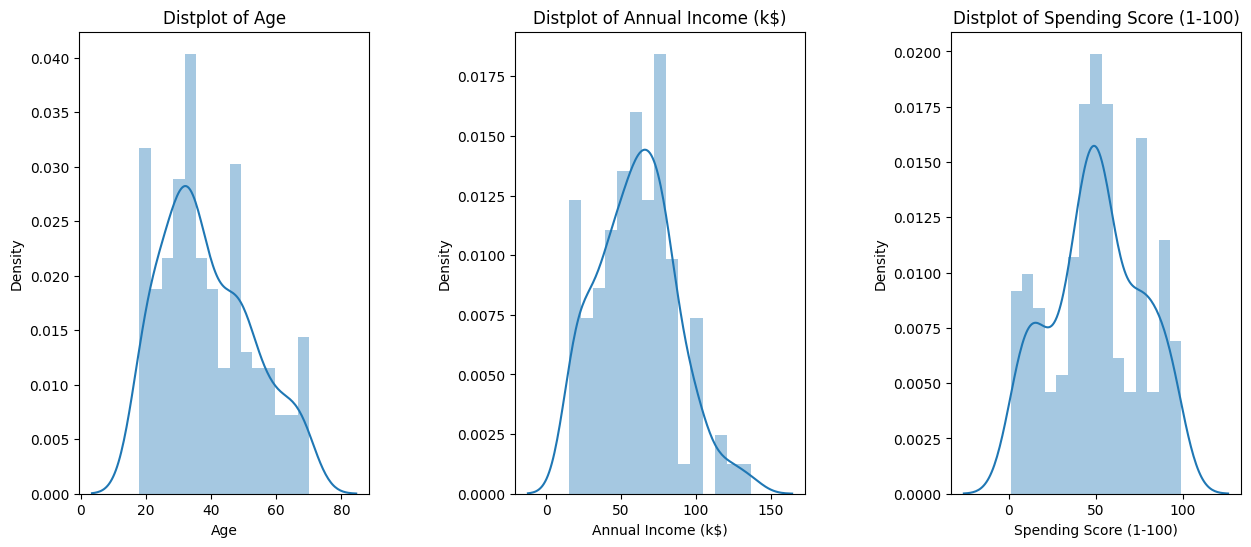

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

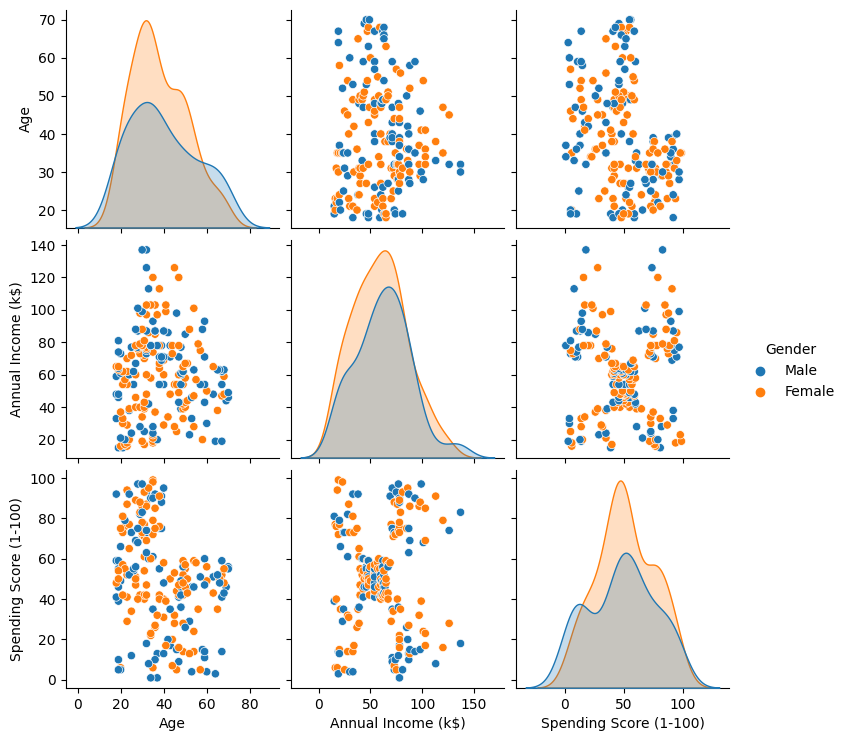

In [15]:
sns.pairplot(df, vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ], hue = "Gender")

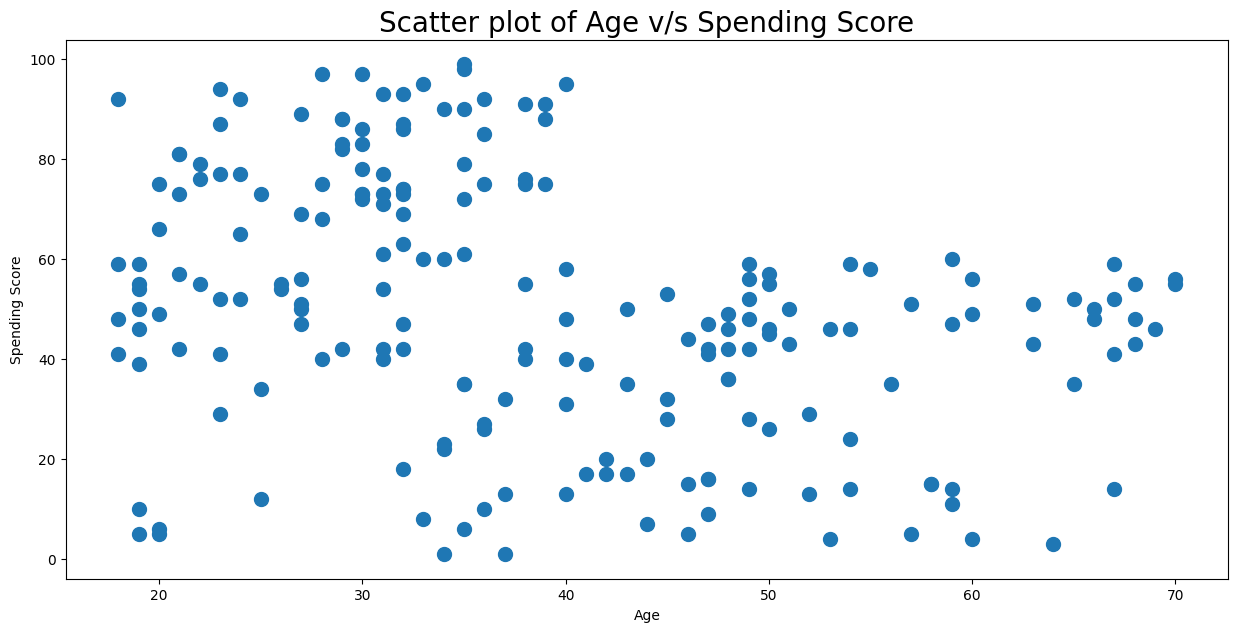

In [21]:
###2D Clustering based on Age and Spending Score:

plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

In [23]:
#Deciding K value:

X1 = df[['Age', 'Spending Score (1-100)']].values
inertia = []
for n in range(1, 11):
    model = (KMeans(n_clusters= n, init='k-means++', n_init= 10, max_iter= 300, tol = 0.0001, random_state= 42, algorithm='elkan'))
    model.fit(X1)
    inertia.append(model.inertia_)

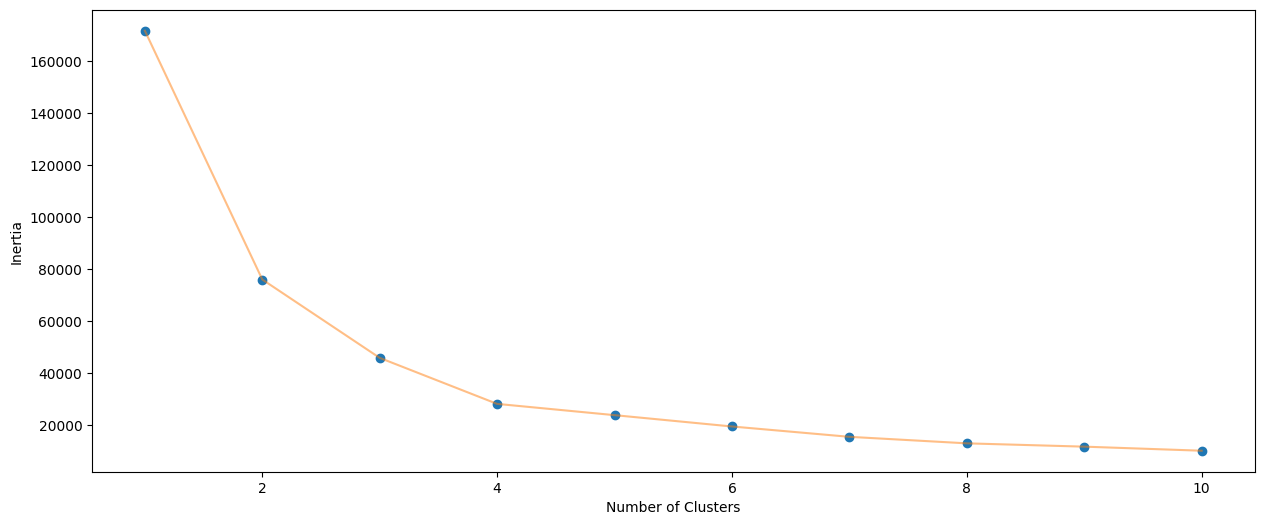

In [24]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

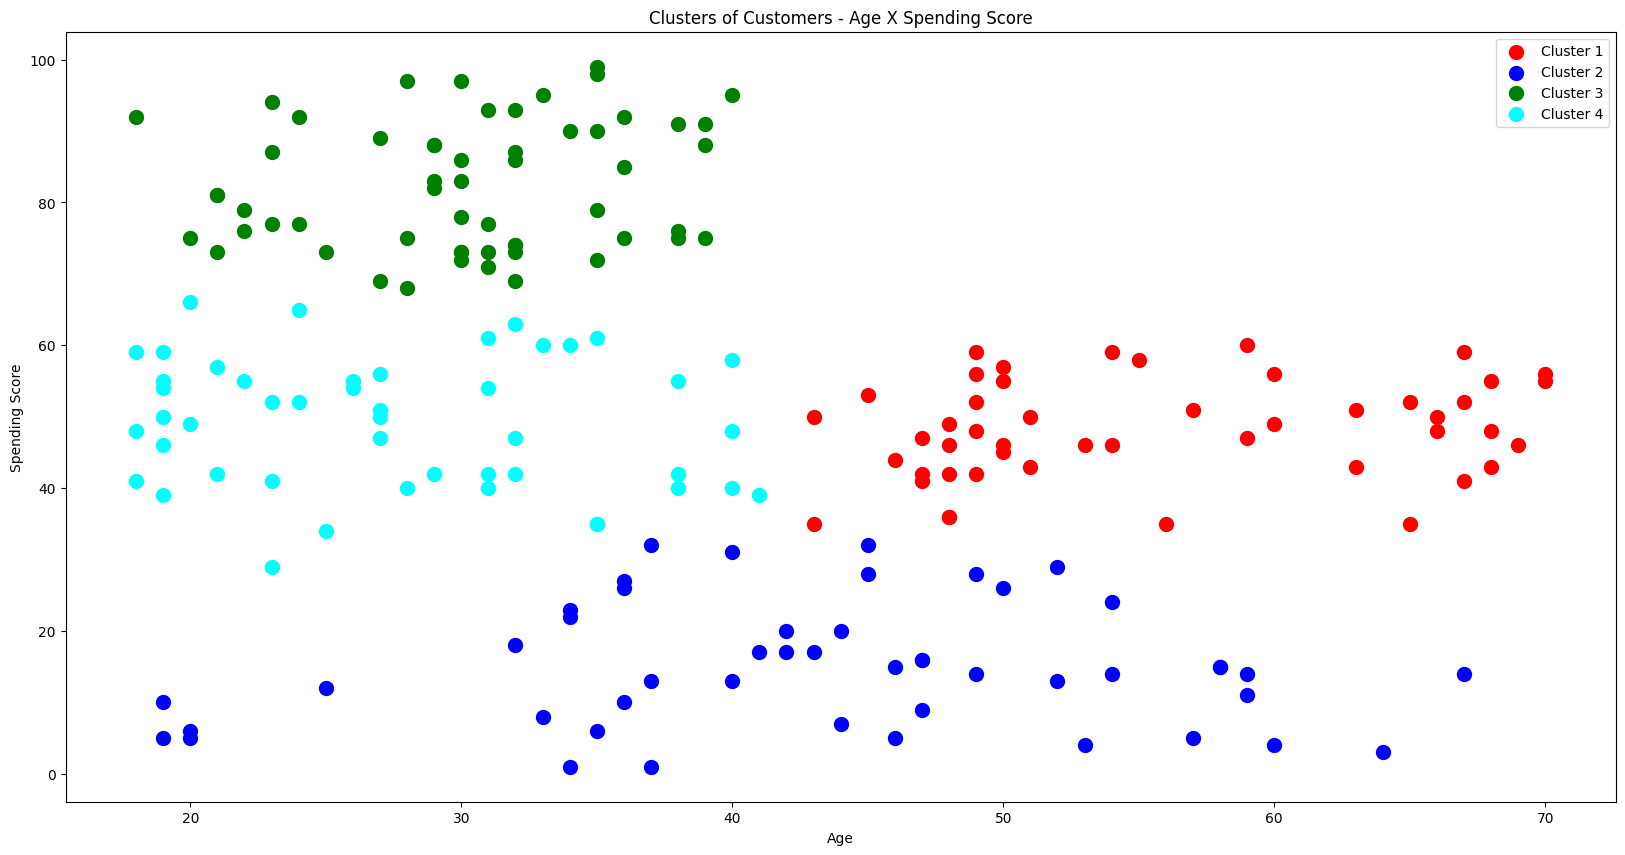

In [31]:
#Applying KMeans for k = 4:

model = (KMeans(n_clusters= 4, init='k-means++', n_init= 10, max_iter= 300, tol = 0.0001, random_state= 42, algorithm='elkan'))
model.fit(X1)
labels = model.labels_
centroids = model.cluster_centers_
y_kmeans = model.fit_predict(X1) 

plt.figure(figsize=(20,10))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Customers - Age X Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

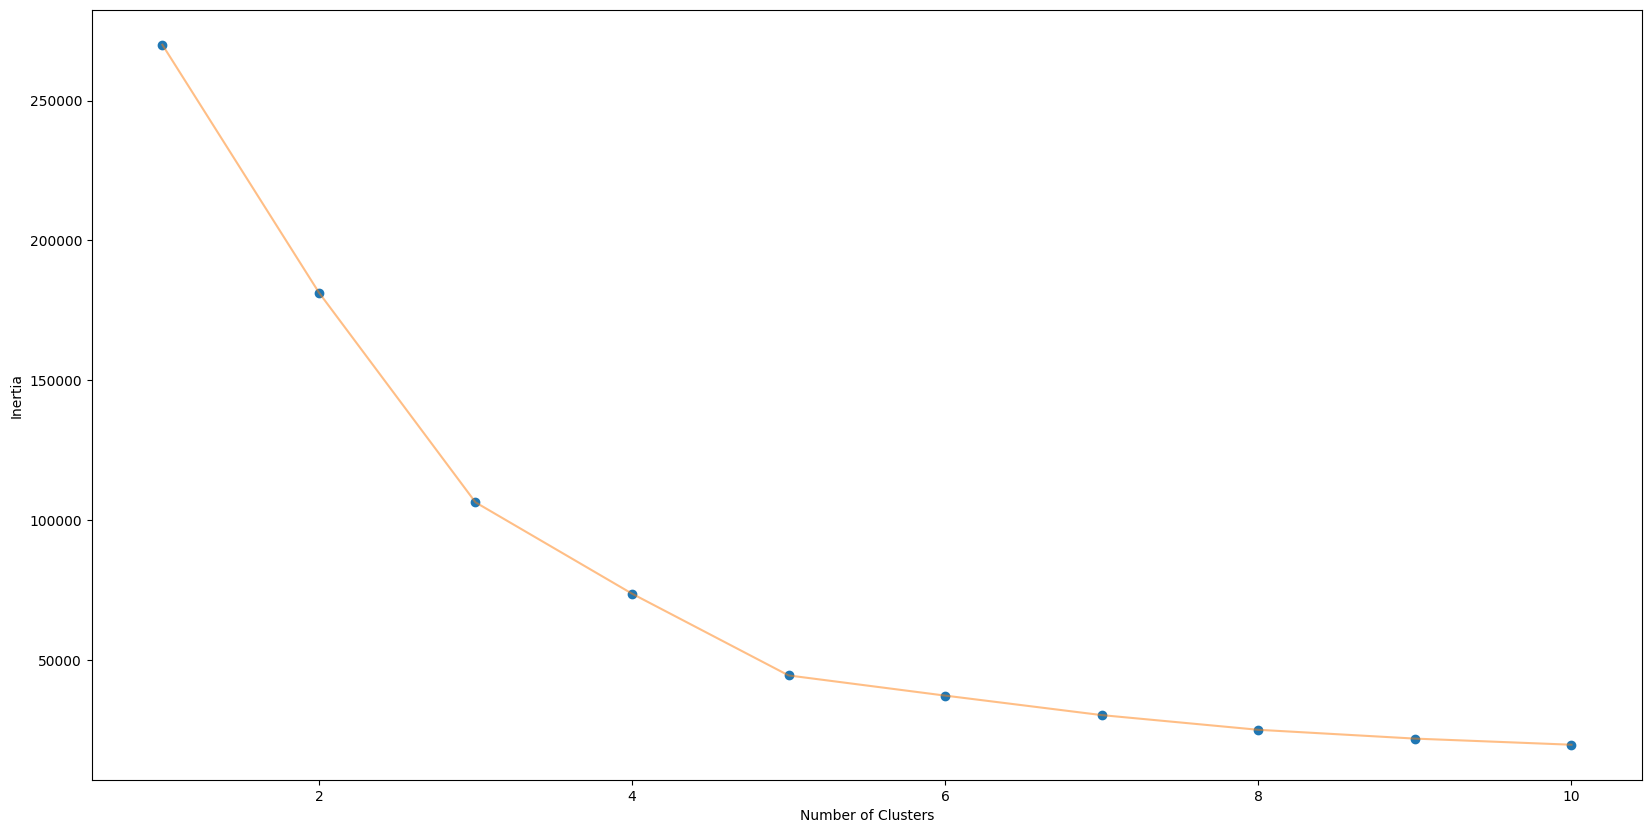

In [29]:
### 2D Clustering based on Annual Income and Spending Score:

X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X2)
    inertia.append(model.inertia_)

plt.figure(1 , figsize = (20, 10))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

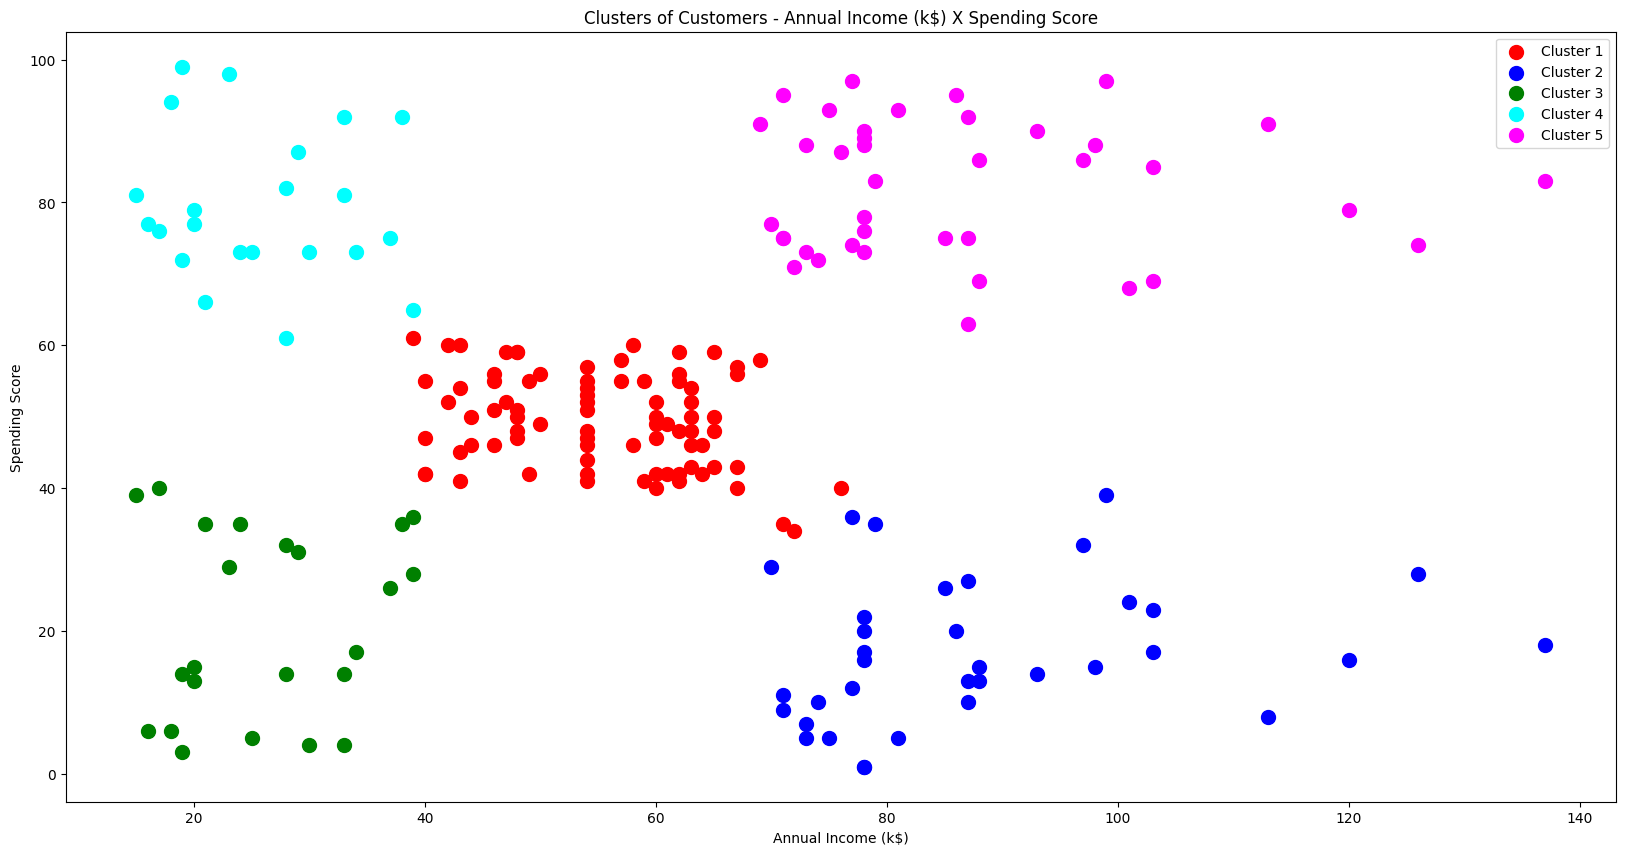

In [30]:
#Choosing k = 5:
model = KMeans(n_clusters = 5,
            init='k-means++',
            max_iter=500,
            random_state=42)
model.fit(X2)
labels = model.labels_
centroids = model.cluster_centers_
y_kmeans = model.fit_predict(X2) 

plt.figure(figsize=(20,10))
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Customers - Annual Income (k$) X Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

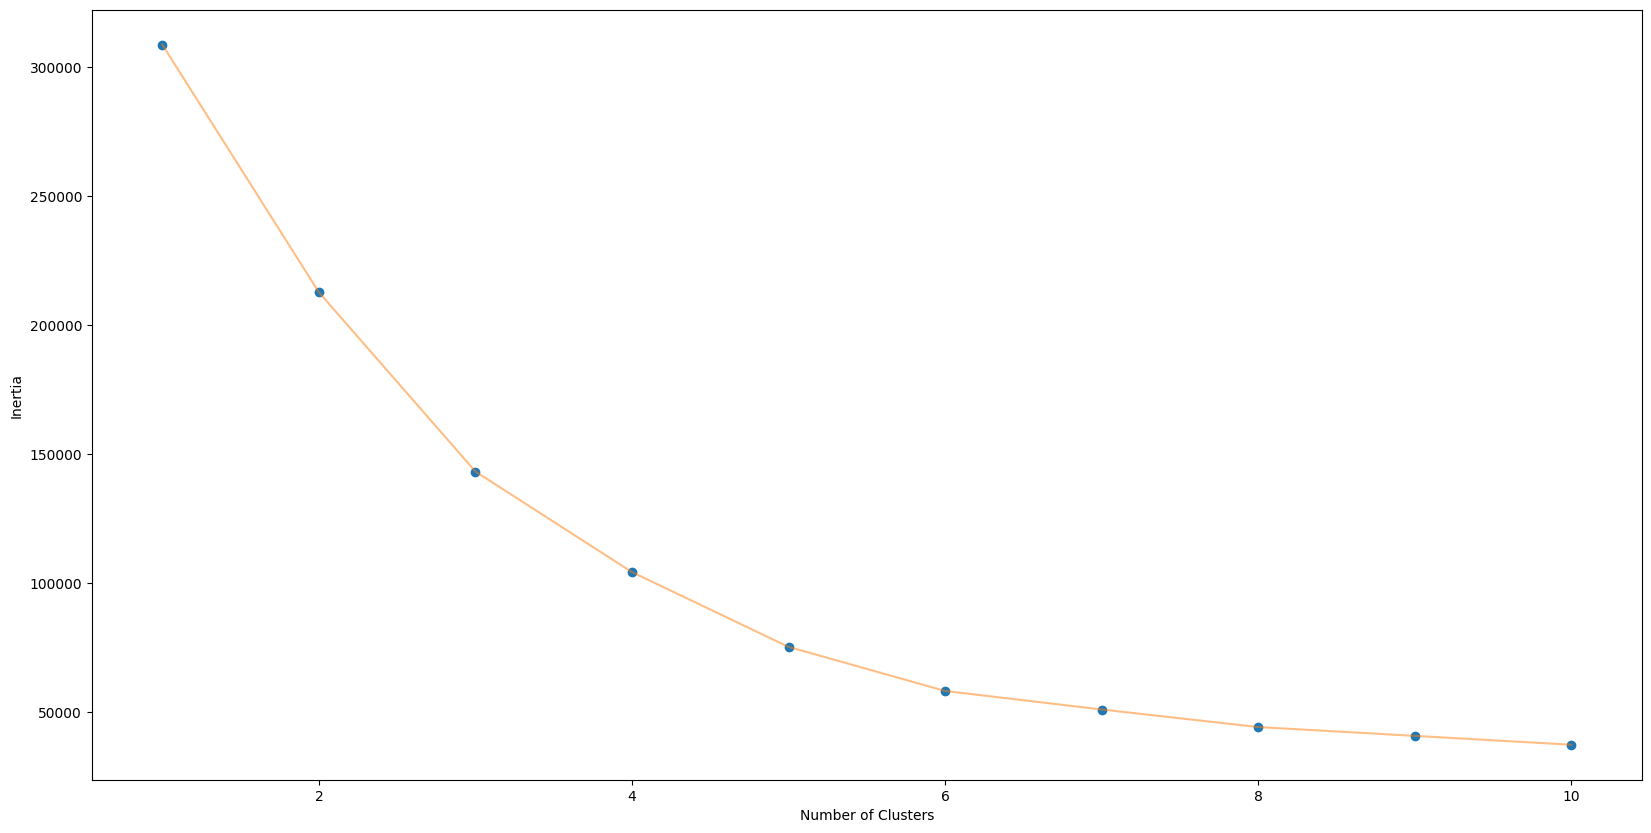

In [32]:
#3D Clustering Age, Annual Income and Spending Score:

X3 = df.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X3)
    inertia.append(model.inertia_)

plt.figure(1 , figsize = (20, 10))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [42]:
model = KMeans(n_clusters = 6,
            init='k-means++',
            max_iter=500,
            random_state=42)
model.fit(X3)
labels = model.labels_
#centroids = model.cluster_centers_

df['cluster'] =  labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,5
197,198,Male,32,126,74,1
198,199,Male,32,137,18,5


In [43]:
print(df.groupby('cluster').mean())   

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                   
0         22.181818  44.318182           25.772727               20.272727
1        162.000000  32.692308           86.538462               82.128205
2         82.022727  56.340909           53.704545               49.386364
3         23.090909  25.272727           25.727273               79.363636
4         90.052632  27.000000           56.657895               49.131579
5        164.428571  41.685714           88.228571               17.285714


In [38]:
#Describe clusters:

from pydoc import describe

c0 = df[df['cluster'] == 0]
c0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,22.181818,44.318182,25.772727,20.272727,0.0
std,13.290299,12.800247,7.646548,12.947446,0.0
min,1.000000,19.000000,15.000000,3.000000,0.0
25%,11.500000,35.250000,19.250000,7.750000,0.0
50%,22.000000,45.500000,24.500000,16.000000,0.0
75%,32.500000,52.750000,32.250000,31.750000,0.0
max,45.000000,67.000000,39.000000,40.000000,0.0


In [39]:
c1 = df[df['cluster'] == 1]
c1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,1.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0
25%,143.000000,30.000000,75.500000,74.500000,1.0
50%,162.000000,32.000000,79.000000,83.000000,1.0
75%,181.000000,35.500000,95.000000,90.000000,1.0
max,200.000000,40.000000,137.000000,97.000000,1.0


In [40]:
c2 = df[df['cluster'] == 2]
c2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,44.000000,44.000000,44.000000,44.000000,44.0
mean,82.022727,56.340909,53.704545,49.386364,2.0
std,22.207781,8.550651,8.239382,5.993081,0.0
min,41.000000,43.000000,38.000000,35.000000,2.0
25%,63.750000,49.000000,47.000000,45.750000,2.0
50%,80.500000,54.000000,54.000000,49.000000,2.0
75%,102.250000,65.250000,62.000000,55.000000,2.0
max,120.000000,70.000000,67.000000,60.000000,2.0


In [45]:
c3 = df[df['cluster'] == 3]
c3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,23.090909,25.272727,25.727273,79.363636,3.0
std,13.147185,5.257030,7.566731,10.504174,0.0
min,2.000000,18.000000,15.000000,61.000000,3.0
25%,12.500000,21.250000,19.250000,73.000000,3.0
50%,23.000000,23.500000,24.500000,77.000000,3.0
75%,33.500000,29.750000,32.250000,85.750000,3.0
max,46.000000,35.000000,39.000000,99.000000,3.0


In [48]:
c4 = df[df['cluster'] == 4]
c4.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,90.052632,27.000000,56.657895,49.131579,4.0
std,26.689351,7.032742,9.905708,7.853975,0.0
min,44.000000,18.000000,39.000000,29.000000,4.0
25%,69.250000,21.000000,48.000000,42.000000,4.0
50%,93.000000,26.500000,59.500000,50.000000,4.0
75%,112.750000,31.750000,63.750000,55.000000,4.0
max,143.000000,40.000000,76.000000,61.000000,4.0


In [49]:
c5 = df[df['cluster'] == 5]
c5.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,164.428571,41.685714,88.228571,17.285714,5.0
std,21.351795,10.897305,16.367266,10.211215,0.0
min,127.000000,19.000000,71.000000,1.000000,5.0
25%,148.000000,35.000000,77.500000,10.000000,5.0
50%,165.000000,43.000000,85.000000,16.000000,5.0
75%,182.000000,47.500000,97.500000,23.500000,5.0
max,199.000000,59.000000,137.000000,39.000000,5.0
